# **Pré-processamento de dados**

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Ativ-KMeans-G4.csv', usecols=['Coluna1', 'Coluna2'])
df

,Coluna1,Coluna2
0,-1.490611,-4.876223
1,-4.496283,-4.287246
2,-4.891142,-9.517835
3,1.429656,9.325864
4,8.880525,-7.939228
...,...,...
9303,8.706990,-8.445860
9304,-4.208513,-2.846779
9305,8.222637,5.704396
9306,-2.659628,-8.208457


No gráfico acima exibimos apenas **"Coluna1"** e **"Coluna2"**. A coluna **"Unnamed: 0"** foi descartada por ser um índice sem utilidade analítica, resultando em 2 colunas e 9.308 linhas no conjunto final.

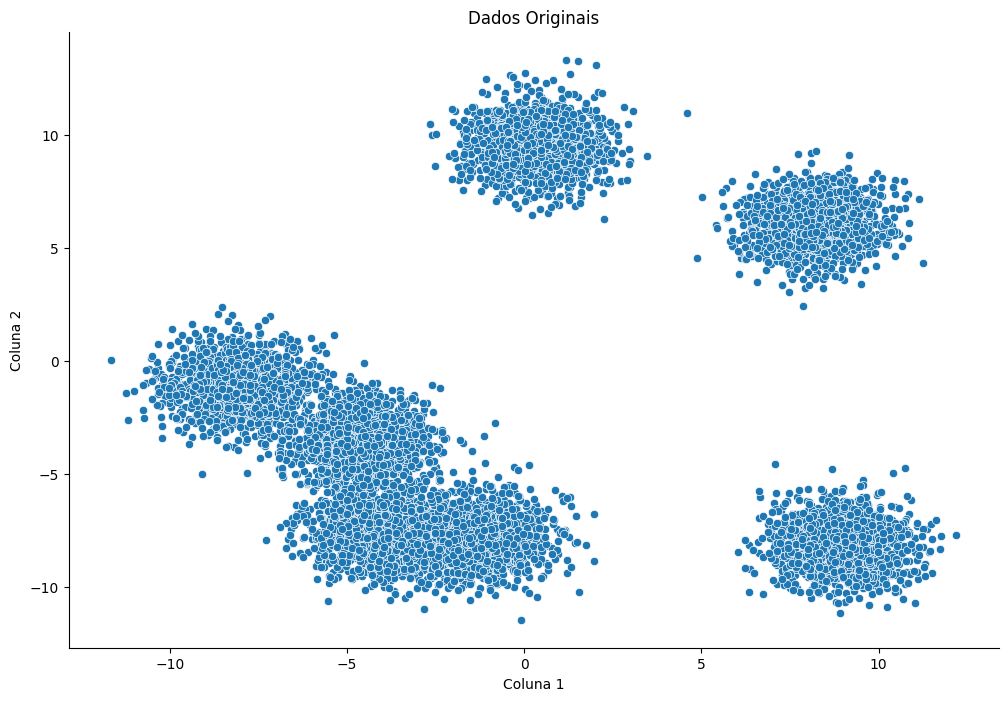

In [8]:
plt.figure(figsize=(12, 8)) # Ajusta o tamanho da figura
sns.scatterplot(data = df, x='Coluna1', y='Coluna2') # Cria o gráfico de dispersão
plt.title('Dados Originais') # Adiciona título
plt.xlabel('Coluna 1') # Adiciona rótulo ao eixo x
plt.ylabel('Coluna 2') # Adiciona rótulo ao eixo y
plt.gca().spines['top'].set_visible(False) # Remove a borda superior
plt.gca().spines['right'].set_visible(False) # Remove a borda direita
#plt.gca().spines['left'].set_visible(False) # Remove a borda esquerda
#plt.gca().spines['bottom'].set_visible(False) # Remove a borda inferior
plt.show()

O gráfico acima foi construído para explorar o comportamento dos dados. A inspeção visual sugere que a base é adequada para aplicar um modelo de agrupamento (K-means). Como hipótese inicial, estima-se a presença de 4 a 6 grupos; no entanto, essa escolha será validada por análises adicionais — como o método do cotovelo e o índice de silhueta — a serem realizadas a seguir.

In [10]:
df.describe()

,Coluna1,Coluna2
count,9306.000000,9306.000000
mean,-0.085808,-1.770489
std,6.093598,6.683535
min,-11.674766,-11.453481
25%,-4.675663,-7.648448
50%,-1.359097,-3.572445
75%,7.375830,5.432200
max,12.195186,13.338676


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9308 entries, 0 to 9307
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Coluna1  9306 non-null   float64
 1   Coluna2  9306 non-null   float64
dtypes: float64(2)
memory usage: 145.6 KB


Após executar o código acima e considerando que a tabela possui 9.308 linhas, observa-se que cada coluna tem 9.306 valores não nulos — ou seja, há 2 valores ausentes por coluna. Como o algoritmo de agrupamento K-means não lida com valores faltantes, iremos imputá-los utilizando a média de cada coluna para viabilizar a modelagem.

In [11]:
df['Coluna1'] = df['Coluna1'].fillna(df['Coluna1'].mean()) # Preenche NaNs com a média em cada coluna
df['Coluna2'] = df['Coluna2'].fillna(df['Coluna2'].mean()) # Preenche NaNs com a média em cada coluna

Para viabilizar o treinamento do K-means sem valores ausentes, imputamos os NaNs de cada coluna utilizando a média da própria coluna.

In [12]:
df[df.duplicated('Coluna1', False)].sort_values('Coluna1')

,Coluna1,Coluna2
1461,-9.202180,0.656190
1474,-9.202180,0.656190
1478,-6.194336,-2.167178
1465,-6.194336,-2.167178
1468,-5.598744,-8.905283
1481,-5.598744,-8.905283
1463,-0.370804,9.938877
1476,-0.370804,9.938877
567,-0.085808,-6.555253
565,-0.085808,-0.967764


In [13]:
df[df.duplicated('Coluna2', False)].sort_values('Coluna2')

,Coluna1,Coluna2
1468,-5.598744,-8.905283
1481,-5.598744,-8.905283
1480,6.628501,-8.518936
1467,6.628501,-8.518936
1466,9.651534,-7.243958
1479,9.651534,-7.243958
1475,7.709613,-6.874689
1462,7.709613,-6.874689
1465,-6.194336,-2.167178
1478,-6.194336,-2.167178


In [14]:
df = df.drop_duplicates(subset = 'Coluna1', keep = 'first')
df

,Coluna1,Coluna2
0,-1.490611,-4.876223
1,-4.496283,-4.287246
2,-4.891142,-9.517835
3,1.429656,9.325864
4,8.880525,-7.939228
...,...,...
9303,8.706990,-8.445860
9304,-4.208513,-2.846779
9305,8.222637,5.704396
9306,-2.659628,-8.208457


Com base nos dois comandos acima, identificamos valores duplicados em **Coluna1** e **Coluna2**. Em seguida, removemos as linhas duplicadas (mantendo a primeira ocorrência) para evitar redundâncias no conjunto de dados.

# **Estudo e aplicação do Kmeans**

In [15]:
norma = MinMaxScaler() # Cria o objeto de normalização
standard_df = pd.DataFrame(norma.fit_transform(df), columns = df.columns) # Aplica a normalização nos dados
standard_df

,Coluna1,Coluna2
0,0.426652,0.265296
1,0.300733,0.289053
2,0.284191,0.078075
3,0.548992,0.838142
4,0.861137,0.141749
...,...,...
9294,0.853867,0.121313
9295,0.312789,0.347154
9296,0.833575,0.692069
9297,0.377677,0.130889


Aplicamos a normalização (MinMaxScaler) para trazer as colunas à mesma escala [0, 1]. Como o K-means é sensível à escala por usar distâncias, essa etapa evita vieses de magnitude e melhora a qualidade dos agrupamentos.

In [16]:
standard_df.describe()

,Coluna1,Coluna2
count,9299.000000,9299.000000
mean,0.485483,0.390578
std,0.255249,0.269526
min,0.000000,0.000000
25%,0.293274,0.153481
50%,0.432006,0.317967
75%,0.798096,0.681086
max,1.000000,1.000000


Podemos perceber que a tabela está de fato padronizada, uma vez que o menor valor é 0 e o maior é 1.

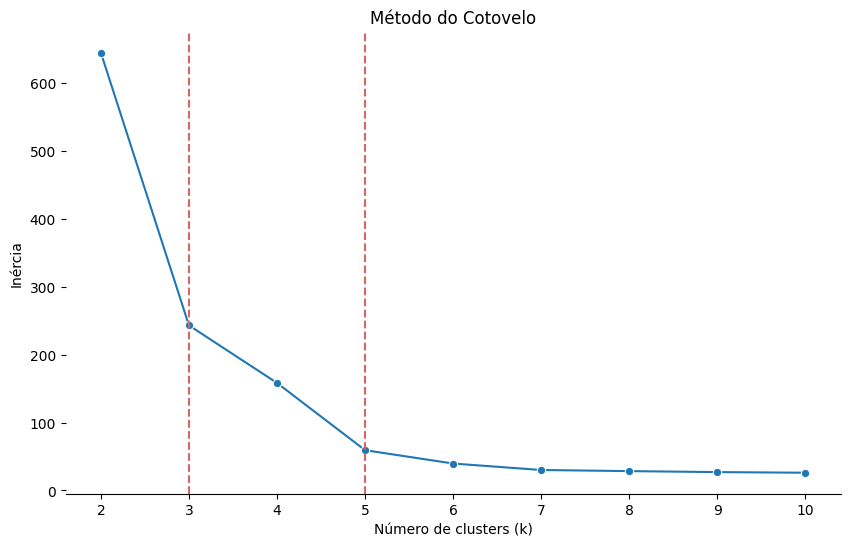

In [17]:
labels = [] # Lista para armazenar os valores de inércia

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42) # Inicializa o KMeans com k clusters
    labels.append(kmeans.fit(standard_df).inertia_) # Armazena a inércia para cada k


plt.figure(figsize=(10, 6))
sns.lineplot(x = range(2, 11), y = labels, marker='o') # Gráfico de linha com marcadores

plt.gca().spines['top'].set_visible(False) # Remove a borda superior
plt.gca().spines['right'].set_visible(False) # Remove a borda direita
plt.gca().spines['left'].set_visible(False) # Remove a borda esquerda

plt.title('Método do Cotovelo') # Adiciona título
plt.xlabel('Número de clusters (k)') # Adiciona rótulo ao eixo x
plt.ylabel('Inércia') # Adiciona rótulo ao eixo y

plt.axvline(x = 3, color = '#D86565', linestyle = '--') # Linha vertical indicando o k escolhido
plt.axvline(x = 5, color = "#D86565", linestyle = '--') # Linha vertical indicando o k escolhido

plt.show() # Exibe o gráfico

O gráfico do "Método do Cotovelo" mostra a relação entre o número de clusters (K) e a inércia do modelo. A inércia representa a soma das distâncias quadráticas das amostras para o centro do cluster mais próximo. Idealmente, procuramos o "cotovelo", o ponto onde a diminuição da inércia se torna significativamente mais lenta.

**Análise do Gráfico:**

- Observa-se uma queda muito acentuada na inércia de K=2 para K=3.

- A queda continua de forma relevante até K=5, após o qual a curva se achata consideravelmente.

- Como destacado pelas linhas tracejadas, o gráfico apresenta uma certa ambiguidade, com "cotovelos" potenciais em K=3 e K=5. Isso indica que, embora o método seja útil, ele não é conclusivo por si só neste caso.

In [18]:
score = [] # Lista para armazenar os valores de inércia

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters = k, random_state = 43) # Inicializa o KMeans com k clusters
    score.append(silhouette_score(standard_df, kmeans.fit_predict(standard_df))) # Armazena a inércia para cada k

pd.DataFrame({'K': [3, 4, 5], 'Score': score})

,K,Score
0,3,0.667362
1,4,0.699658
2,5,0.671148


O Coeficiente de Silhueta é uma métrica que avalia a qualidade da clusterização. Ele mede quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). O score varia de -1 a 1, onde um valor mais alto indica que os objetos estão bem pareados com seus próprios clusters e mal pareados com clusters vizinhos.

**Análise dos Scores:**

- **K = 3:** Score de `0.667`

- **K = 4**: Score de `0.699`

- **K = 5:** Score de `0.671`

O resultado desta métrica é inequívoco: **K=4 obteve o maior** `silhouette_score`. Isso sugere que a configuração com 4 clusters proporciona o melhor equilíbrio entre coesão e separação, sendo a escolha matematicamente mais forte entre as opções testadas.

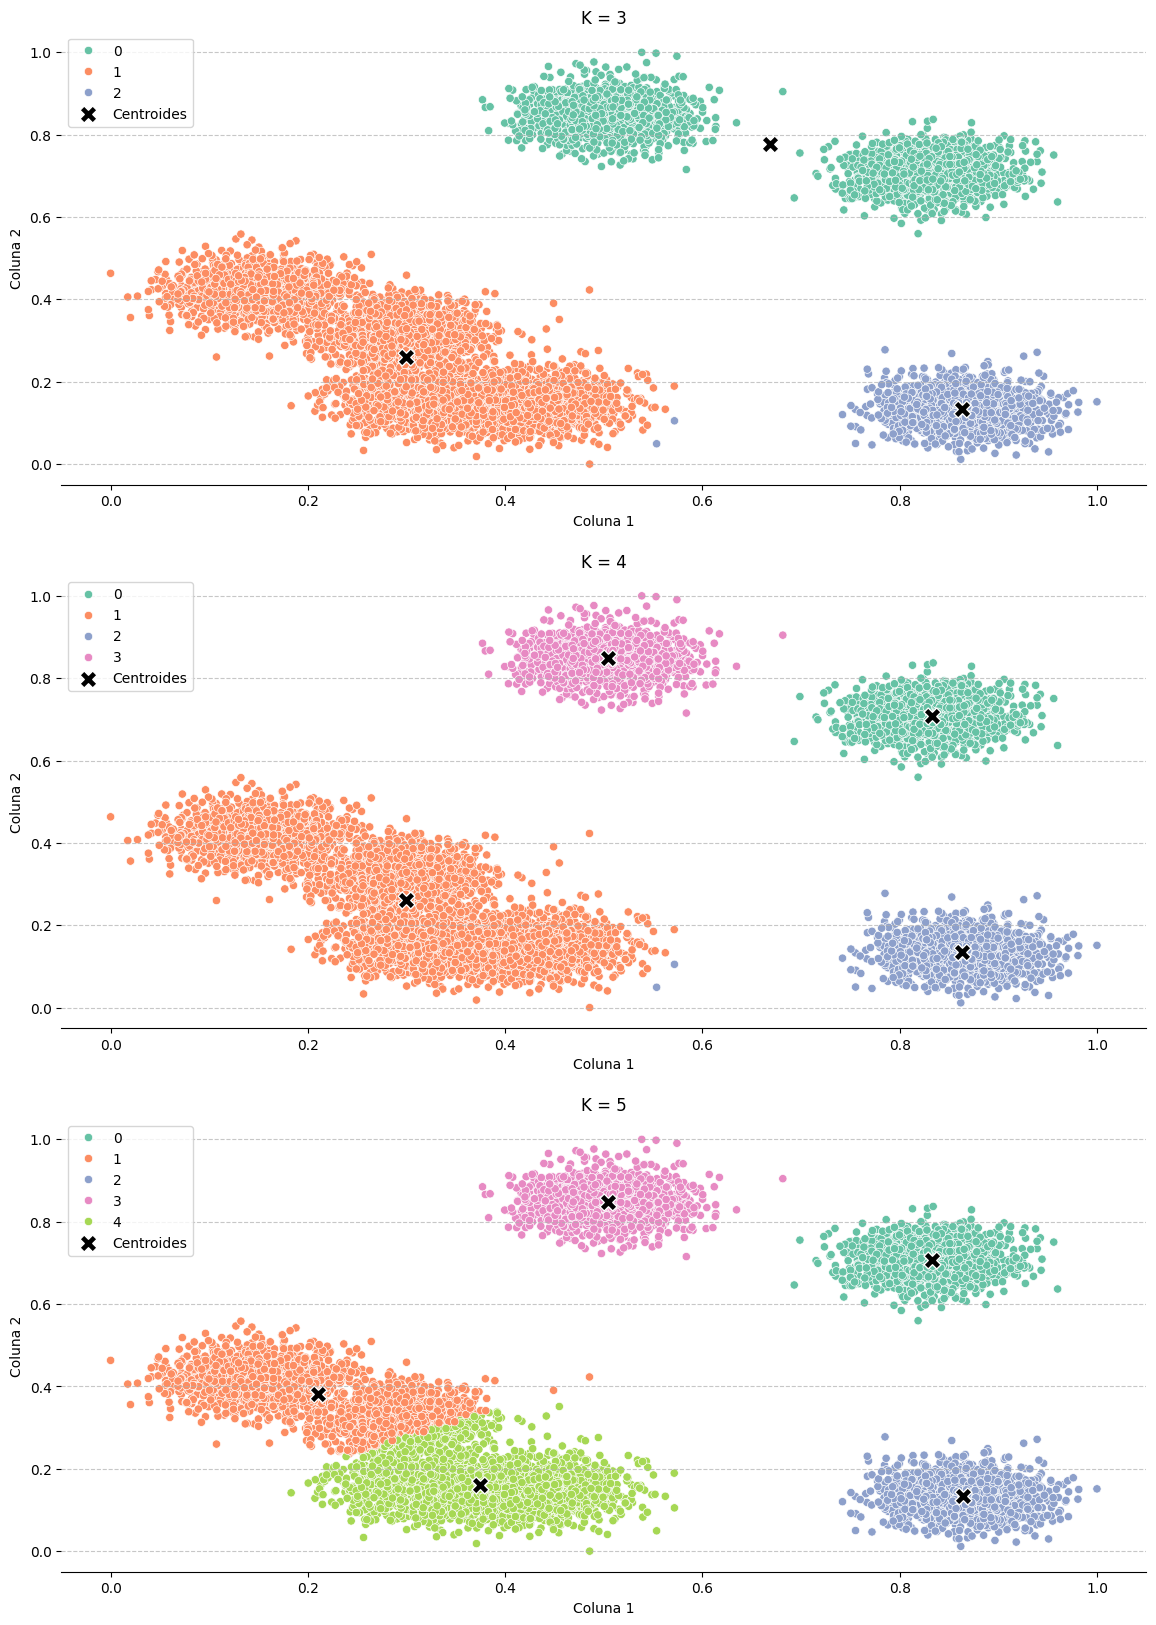

In [19]:
score = [] # Lista para armazenar os valores de inércia

fig, (up, middle, down) = plt.subplots(3, 1, figsize=(14, 20))
graphics = [up, middle, down] # Lista para armazenar os gráficos

for pos, k in enumerate([3, 4, 5]):
    kmeans = KMeans(n_clusters = k, random_state = 43) # Inicializa o KMeans com k clusters
    kmeans.fit(standard_df)

    aux = standard_df.copy()
    aux['Cluster'] = kmeans.labels_
    sns.scatterplot(data = aux, x = 'Coluna1', y = 'Coluna2', hue = 'Cluster', palette = 'Set2', legend = 'full', ax=graphics[pos])
    sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], s = 150, color = 'black', marker = 'X', label = 'Centroides', ax=graphics[pos])

    graphics[pos].set_title(f'K = {k}')
    graphics[pos].set_xlabel('Coluna 1')
    graphics[pos].set_ylabel('Coluna 2')
    graphics[pos].legend(loc='upper left')

    graphics[pos].spines['top'].set_visible(False) # Remove a borda superior
    graphics[pos].spines['right'].set_visible(False) # Remove a borda direita
    graphics[pos].spines['left'].set_visible(False) # Remove a borda esquerda

    graphics[pos].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

A visualização dos dados clusterizados nos permite avaliar qualitativamente se os agrupamentos fazem sentido intuitivo.

**Análise dos Gráficos:**

- **K = 3:** O agrupamento parece razoável, mas o cluster laranja à esquerda é muito extenso e parece conter duas "nuvens" de pontos distintas que poderiam ser separadas.

- **K = 5:** Este modelo divide o grande cluster laranja visto em K=3 em dois (laranja e verde claro). Embora isso capture a subestrutura, a separação entre os outros clusters pode não ser tão otimizada quanto em outras configurações.

- **K = 4:** Esta configuração parece ser a mais natural. Ela separa claramente os quatro principais grupos de dados visíveis no gráfico. Cada cluster parece denso e bem-definido, correspondendo ao que se esperaria de uma boa segmentação. O modelo consegue separar o grupo do meio-superior (rosa) do grupo da direita (verde-água), uma distinção que K=3 não faz.

In [20]:
kmeans = KMeans(n_clusters = 4, random_state = 42) # Inicializa o KMeans com k clusters
df['Cluster'] = kmeans.fit_predict(standard_df)
davies_bouldin_score(standard_df, kmeans.fit_predict(standard_df))

/tmp/ipython-input-4243312738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(standard_df)


np.float64(0.32729637162671027)

In [21]:
df[df['Cluster'] == 0][['Coluna1', 'Coluna2']].describe()

,Coluna1,Coluna2
count,5311.000000,5311.000000
mean,-4.527302,-4.982887
std,2.637605,3.039917
min,-11.674766,-11.453481
25%,-6.465838,-7.727229
50%,-4.327925,-5.516489
75%,-2.595981,-2.227419
max,1.965160,2.394159


In [22]:
df[df['Cluster'] == 1][['Coluna1', 'Coluna2']].describe()

,Coluna1,Coluna2
count,1329.000000,1329.000000
mean,8.191192,6.099258
std,0.974719,0.994083
min,4.869190,2.418854
25%,7.548146,5.432282
50%,8.191081,6.115886
75%,8.842159,6.798009
max,11.243579,9.301237


In [23]:
df[df['Cluster'] == 2][['Coluna1', 'Coluna2']].describe()

,Coluna1,Coluna2
count,1328.000000,1328.000000
mean,0.353389,9.577957
std,0.983489,1.041723
min,-2.674520,6.280396
25%,-0.300562,8.900922
50%,0.353778,9.570771
75%,0.980689,10.302406
max,4.593015,13.338676


In [24]:
df[df['Cluster'] == 3][['Coluna1', 'Coluna2']].describe()

,Coluna1,Coluna2
count,1331.000000,1331.000000
mean,8.930553,-8.131150
std,1.024326,1.006382
min,1.539021,-11.164393
25%,8.259572,-8.851395
50%,8.961272,-8.128711
75%,9.627459,-7.456352
max,12.195186,-4.573493


Como podemos analisar nas tabelas acima, podemos notar que

## **Conclusão Final**
A análise conjunta das três abordagens fornece uma conclusão robusta:

1. O Método do Cotovelo foi inconclusivo, sugerindo K=3 ou K=5 como candidatos, mas sem uma resposta definitiva.

2. O `silhouette_score` apontou claramente para K=4 como a melhor opção quantitativa, com o valor mais alto de `0.699`.

3. A inspeção visual reforçou essa escolha, mostrando que a clusterização com K=4 resulta nos agrupamentos mais intuitivos e visualmente distintos, alinhando-se perfeitamente com a distribuição espacial dos dados.

Portanto, a decisão de prosseguir com o aprendizado usando o K-Means com K=4 é a mais bem fundamentada, combinando a melhor performance em métricas de avaliação com a interpretação visual mais lógica da estrutura dos dados.